In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

db = pd.read_csv('./BankChurners.csv')

db.head()


C:\Users\mpsga\AppData\Local\Temp\ipykernel_14224\2331299156.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [2]:
colunas_desejadas = ['Attrition_Flag','Customer_Age','Gender','Dependent_count','Education_Level','Income_Category','Card_Category','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Trans_Amt','Total_Trans_Ct']
db_origim = db[colunas_desejadas]
db_origim.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct
0,Existing Customer,45,M,3,High School,$60K - $80K,Blue,39,5,1,3,12691.0,1144,42
1,Existing Customer,49,F,5,Graduate,Less than $40K,Blue,44,6,1,2,8256.0,1291,33
2,Existing Customer,51,M,3,Graduate,$80K - $120K,Blue,36,4,1,0,3418.0,1887,20
3,Existing Customer,40,F,4,High School,Less than $40K,Blue,34,3,4,1,3313.0,1171,20
4,Existing Customer,40,M,3,Uneducated,$60K - $80K,Blue,21,5,1,0,4716.0,816,28


In [3]:
label_encoder = LabelEncoder()

db = db_origim.copy()
db['Gender'] = label_encoder.fit_transform(db['Gender'])
db['Attrition_Flag'] = label_encoder.fit_transform(db['Attrition_Flag'])

education_mapping = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5,
    'Unknown': -1  
}
card_category_mapping = {
    'Blue': 0,
    'Gold': 1,
    'Silver': 2,
    'Platinum': 3
}
income_category_mapping = {
    '$60K - $80K': 0,
    'Less than $40K': 1,
    '$80K - $120K': 2,
    '$40K - $60K': 3,
    '$120K +': 4
}
db['Education_Level'] = db['Education_Level'].map(education_mapping)
db['Card_Category'] = db['Card_Category'].map(card_category_mapping)

db = db.query("Income_Category != 'Unknown'")
db['Income_Category'] = db['Income_Category'].map(income_category_mapping)

scaler = StandardScaler()
db = pd.DataFrame(db, columns=db_origim.columns)
data_encoded = scaler.fit_transform(db)
db.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct
0,1,45,1,3,1,0,0,39,5,1,3,12691.0,1144,42
1,1,49,0,5,3,1,0,44,6,1,2,8256.0,1291,33
2,1,51,1,3,3,2,0,36,4,1,0,3418.0,1887,20
3,1,40,0,4,1,1,0,34,3,4,1,3313.0,1171,20
4,1,40,1,3,0,0,0,21,5,1,0,4716.0,816,28


Número ótimo de clusters: 5


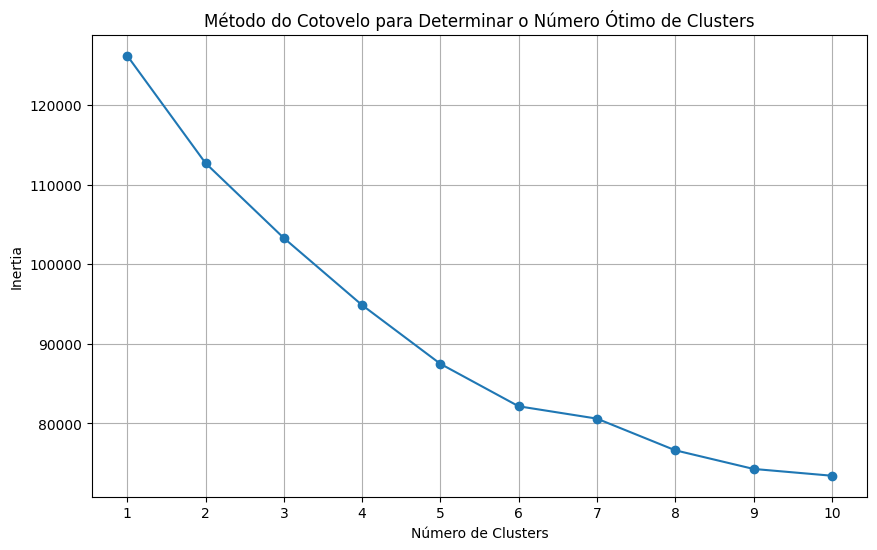

In [4]:
# Aplicando o método do cotovelo para encontrar o número ótimo de clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded)
    inertia.append(kmeans.inertia_)

# Função para calcular a distância de cada ponto até a linha AB
def distance_from_line(A, B, P):
    """Calcula a distância do ponto P até a linha formada pelos pontos A e B"""
    num = np.abs((B[1]-A[1])*P[0] - (B[0]-A[0])*P[1] + B[0]*A[1] - B[1]*A[0])
    den = np.sqrt((B[1]-A[1])**2 + (B[0]-A[0])**2)
    return num / den

# Pontos que definem a linha (primeiro e último pontos da curva de inércia)
A = np.array([1, inertia[0]])
B = np.array([len(K_range), inertia[-1]])

# Calculando a distância de cada ponto da inércia até a linha
distances = []
for i, val in enumerate(inertia):
    P = np.array([i+1, val])
    distances.append(distance_from_line(A, B, P))

# Encontrando o ponto de cotovelo (maior distância)
optimal_k = distances.index(max(distances)) + 1

print("Número ótimo de clusters:", optimal_k)





# Plotando o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo para Determinar o Número Ótimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [5]:
# Aplicando o método k-means para os dados do conjunto de dados
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_encoded)

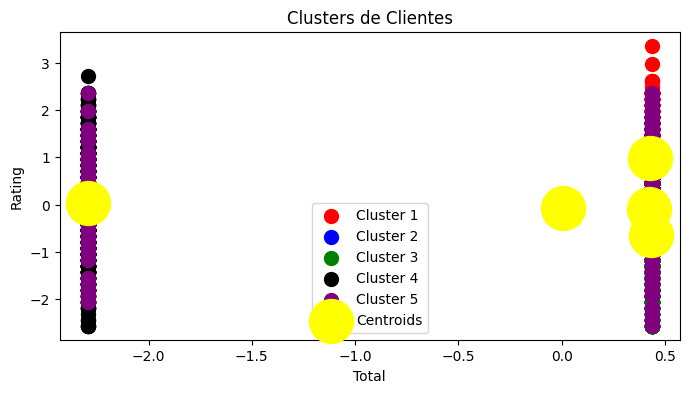

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct
0,0.436003,-0.167938,0.954553,0.498069,-0.351307,-1.388640,-0.265572,0.384946,0.763262,-1.329784,0.492457,0.456425,-0.949093,-0.958037
1,0.436003,0.336254,-1.047610,2.042382,0.826467,-0.548973,-0.265572,1.015999,1.405908,-1.329784,-0.410247,-0.029219,-0.906494,-1.338094
2,0.436003,0.588351,0.954553,0.498069,0.826467,0.290693,-0.265572,0.006314,0.120616,-1.329784,-2.215655,-0.558993,-0.733780,-1.887065
3,0.436003,-0.798179,-1.047610,1.270225,-0.351307,-0.548973,-0.265572,-0.246107,-0.522029,1.653790,-1.312951,-0.570491,-0.941269,-1.887065
4,0.436003,-0.798179,0.954553,0.498069,-0.940195,-1.388640,-0.265572,-1.886846,0.763262,-1.329784,-2.215655,-0.416859,-1.044144,-1.549237


In [6]:
#Plotando os clusters
data_encoded = pd.DataFrame(data_encoded, columns=db_origim.columns)

plt.figure(figsize=(8, 4))
plt.scatter(data_encoded.iloc[pred_y == 0, 0], data_encoded.iloc[pred_y == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_encoded.iloc[pred_y == 1, 0], data_encoded.iloc[pred_y == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_encoded.iloc[pred_y == 2, 0], data_encoded.iloc[pred_y == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(data_encoded.iloc[pred_y == 3, 0], data_encoded.iloc[pred_y == 3, 1], s=100, c='black', label='Cluster 4')
plt.scatter(data_encoded.iloc[pred_y == 4, 0], data_encoded.iloc[pred_y == 4, 1], s=100, c='purple', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=1000, c='yellow', label='Centroids')
plt.title('Clusters de Clientes')
plt.xlabel('Total')
plt.ylabel('Rating')
plt.legend()
plt.show()
data_encoded.head()

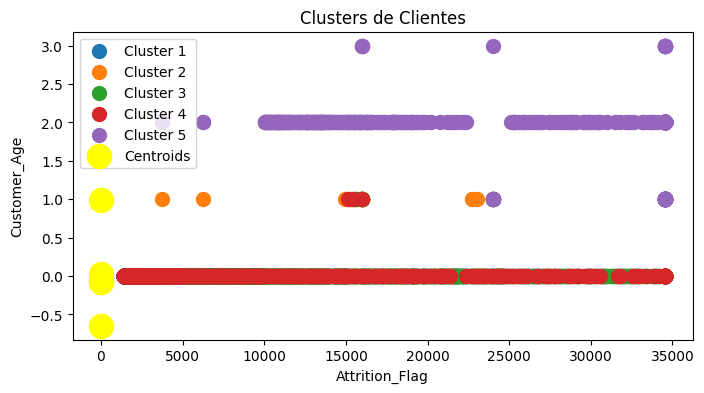

In [7]:
# Adiciona os rótulos dos clusters ao DataFrame original
db['Cluster'] = pred_y

# Plotando os clusters usando o DataFrame original
plt.figure(figsize=(8, 4))
for cluster_label in range(5):  # Assumindo 5 clusters
    cluster_data = db[db['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Credit_Limit'], cluster_data['Card_Category'], s=100, label=f'Cluster {cluster_label + 1}')

# Plotando os centróides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

# Adiciona rótulos e legenda
plt.title('Clusters de Clientes')
plt.xlabel('Attrition_Flag')
plt.ylabel('Customer_Age')
plt.legend()
plt.show()